## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ACF for Returns

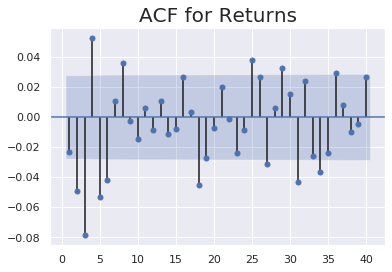

In [8]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for Returns', size=20);

## MA(1) for Returns

In [9]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
#order: pierwsza wartość dotyczy modelu AR, natomiast 2 modelu MA
result_ret_ma_1 = model_ret_ma_1.fit()
result_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 28 Mar 2020   AIC                          15865.190
Time:                        07:25:14   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag MA Models for Returns

In [21]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
result_ret_ma_2 = model_ret_ma_2.fit()
print(result_ret_ma_2.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 28 Mar 2020   AIC                          15853.728
Time:                        07:32:08   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [22]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
result_ret_ma_3 = model_ret_ma_3.fit()
print(result_ret_ma_3.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 28 Mar 2020   AIC                          15818.634
Time:                        07:32:11   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [23]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
result_ret_ma_4 = model_ret_ma_4.fit()
print(result_ret_ma_4.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 28 Mar 2020   AIC                          15809.547
Time:                        07:32:17   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [24]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,5))
result_ret_ma_5 = model_ret_ma_3.fit()
print(result_ret_ma_5.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 28 Mar 2020   AIC                          15818.634
Time:                        07:32:20   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [25]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,6))
result_ret_ma_6 = model_ret_ma_6.fit()
print(result_ret_ma_6.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 28 Mar 2020   AIC                          15794.442
Time:                        07:32:37   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [26]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,7))
result_ret_ma_7 = model_ret_ma_7.fit()
print(result_ret_ma_7.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 28 Mar 2020   AIC                          15796.091
Time:                        07:33:02   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [27]:
# sprawdzamy ze względu na to, że na wykresie widsać było, że 
# 8 wartość była znacząca
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
result_ret_ma_8 = model_ret_ma_8.fit()
print(result_ret_ma_8.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 28 Mar 2020   AIC                          15791.205
Time:                        07:35:59   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [30]:
# teraz porównujemy z model 8 z modelem 6
# DF = 2, dlatego, że porównujemy model 8 z 6 (czyli o 2 miejsca większy)
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_6, model_ret_ma_8, DF=2)))


LLR test p-value = 0.027


0.027 < 0,05, czyli MA(8) > MA(6). Bardziej skomplikowany model sprawdza się lepiej od prostrzego.

## Residuals for Returns

In [31]:
df['res_ret_ma_8'] = result_ret_ma_8.resid[1:]

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
round(df.res_ret_ma_8.mean(),3)

-0.0

In [33]:
round(df.res_ret_ma_8.var(),3)

1.356

In [35]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.164

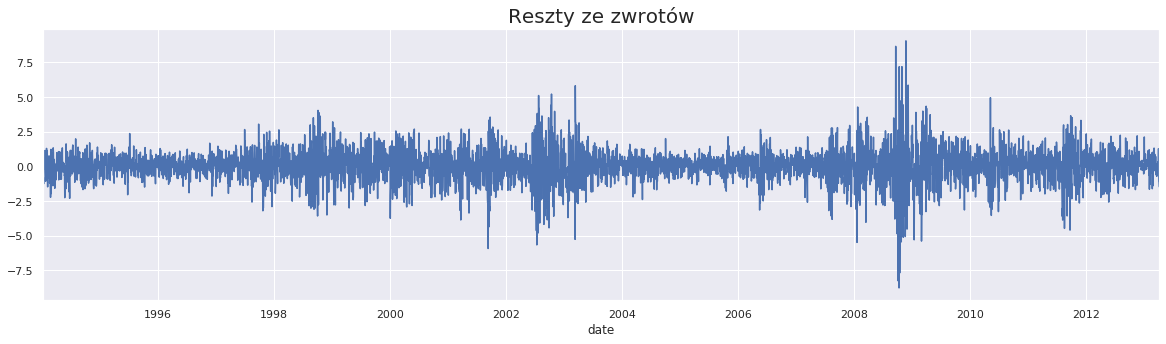

In [36]:
df.res_ret_ma_8[1:].plot(figsize=(20,5))
plt.title('Reszty ze zwrotów', size=20);

In [37]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581939029763,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052184708033)

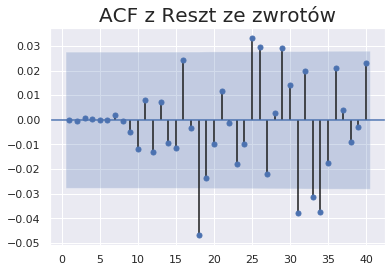

In [38]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF z Reszt ze zwrotów', size=20);

Większość ze współczynników nie są znaczące (pierwsze 17)

## Normalized Returns

In [39]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
df.head()

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


market_value   returns  res_ret_ma_8    norm_ret
date                                                        
1994-01-07       3445.98       NaN           NaN         NaN
1994-01-10       3440.58 -0.156704           NaN  100.000000
1994-01-11       3413.77 -0.779229     -0.802111  497.260711
1994-01-12       3372.02 -1.222988     -1.269464  780.443046
1994-01-13       3360.01 -0.356166     -0.464780  227.285567

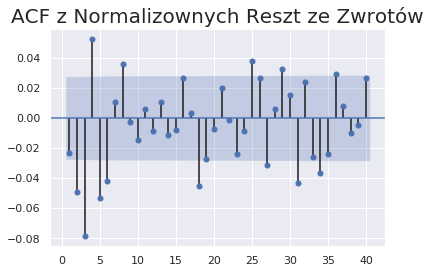

In [41]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title('ACF z Normalizownych Reszt ze Zwrotów', size=20);

In [42]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sat, 28 Mar 2020   AIC                          80635.194
Time:                        08:30:24   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.311       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [43]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid[1:]

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


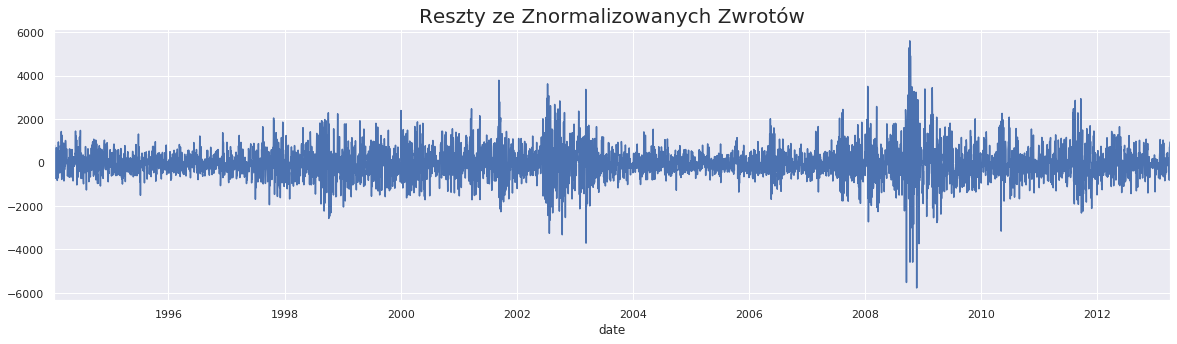

In [44]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title('Reszty ze Znormalizowanych Zwrotów', size=20);

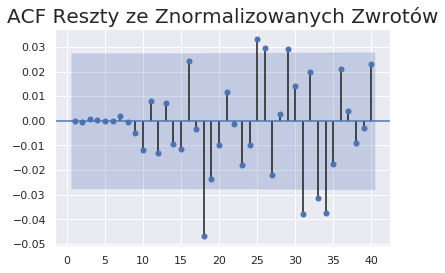

In [45]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF Reszty ze Znormalizowanych Zwrotów', size=20);

## MA Models For Prices

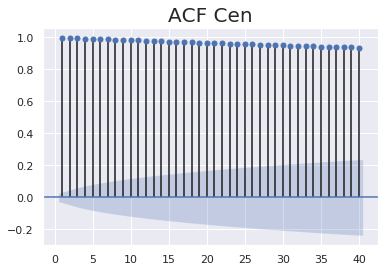

In [46]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF Cen', size=20);

In [47]:
model_ma_1 = ARMA(df.market_value, order=(0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Sat, 28 Mar 2020   AIC                          77264.000
Time:                        08:39:41   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6029     14.660    347.187      0.000    5060.871    5118.335
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

## Modele MA nie radzą sobie dobrze z niestacjonarnymi danymi